In [1]:
import sys
sys.path.append('../')
import numpy as np
import hallgerd
import matplotlib
import pylab as plt

In [2]:
plt.style.use('dark_background')

In [3]:
from hallgerd.cpu.mlp import MLP

In [4]:
def xor(x1, x2):
#     if 1/(x1*x1) + 1/(x2*x2) > 4:
    if x1*x1 + x2*x2 < 3:
        return 1
    return 0

vxor = np.vectorize(xor)
X = np.random.randn(10000, 2,)
y = vxor(X[:,0], X[:,1])

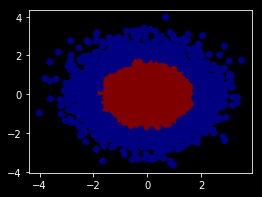

In [5]:
plt.figure(figsize=(4,3))
plt.scatter(X[:,0], X[:,1], c=y, cmap=matplotlib.cm.jet)
plt.show()

In [6]:
X = X.T
y = y.reshape((1,-1))

In [7]:
mlp = MLP(lr=0.1, batch_size=4, epochs=10)
mlp.add(2, 4)
mlp.add(4, 1)
mlp.fit(X, y)

100%|██████████| 10/10 [00:01<00:00,  5.68it/s]


In [8]:
ypp = np.zeros(X.shape[1])
yp = np.zeros(X.shape[1])
for i in range(X.shape[1]):
    ypp[i] = mlp(X[:, i:i+1])
    yp[i] = 1 if ypp[i] >= 0.5 else 0

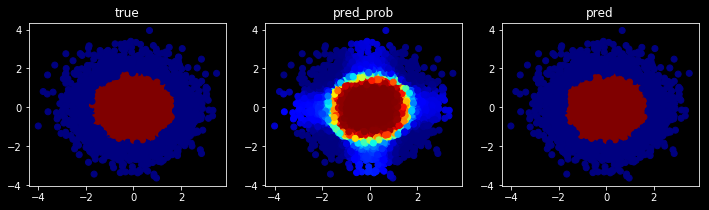

In [9]:
fig, ax = plt.subplots(ncols=3, figsize=(12,3))
ax[0].scatter(X[0], X[1], c=y[0], cmap=matplotlib.cm.jet)
ax[1].scatter(X[0], X[1], c=ypp, cmap=matplotlib.cm.jet)
ax[2].scatter(X[0], X[1], c=yp, cmap=matplotlib.cm.jet)
ax[0].set_title('true')
ax[1].set_title('pred_prob')
ax[2].set_title('pred')
plt.show()

In [12]:
mlp(X[:, 0:2])

array([[0.99789211, 0.97691527]])

In [13]:
mlp(X[:, 0:3])

array([[0.99789211, 0.97691527, 0.9686173 ]])